# Credit Card Fraud Detection
Project from Eduonix Learning Solutions: 
[Build A Complete Project In Machine Learning | Credit Card Fraud Detection 2019 | Eduonix](https://www.youtube.com/watch?v=gCWBFyFTxVU&list=TLPQMjIwMzIwMjGI8nKrit4spA&index=2)

In [1]:
import sys
import numpy as np
import pandas
import matplotlib
import seaborn as sns
import scipy
import sklearn

In [2]:
print(f'Python: {sys.version}')
print(f'Numpy: {np.version}')
print(f'Pandas: {pandas.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Scipy: {scipy.__version__}')
print(f'Sklearn: {sklearn.__version__}')

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Numpy: <module 'numpy.version' from 'C:\\Users\\ajgal\\anaconda3\\lib\\site-packages\\numpy\\version.py'>
Pandas: 1.1.3
Matplotlib: 3.3.2
Seaborn: 0.11.0
Scipy: 1.5.2
Sklearn: 0.23.2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset from the csv file using pandas

In [4]:
data = pd.read_csv('creditcard.csv')

### Explore the dataset
This dataset was created by having the original dataset having a PCA dimensionality reduction on the dataset to remove identifying attributes from the dataset to protect the id's of the credit card holders

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.shape

(284807, 31)

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [9]:
data = data.sample(frac=0.1,
                  random_state=42)
data.shape

(28481, 31)

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

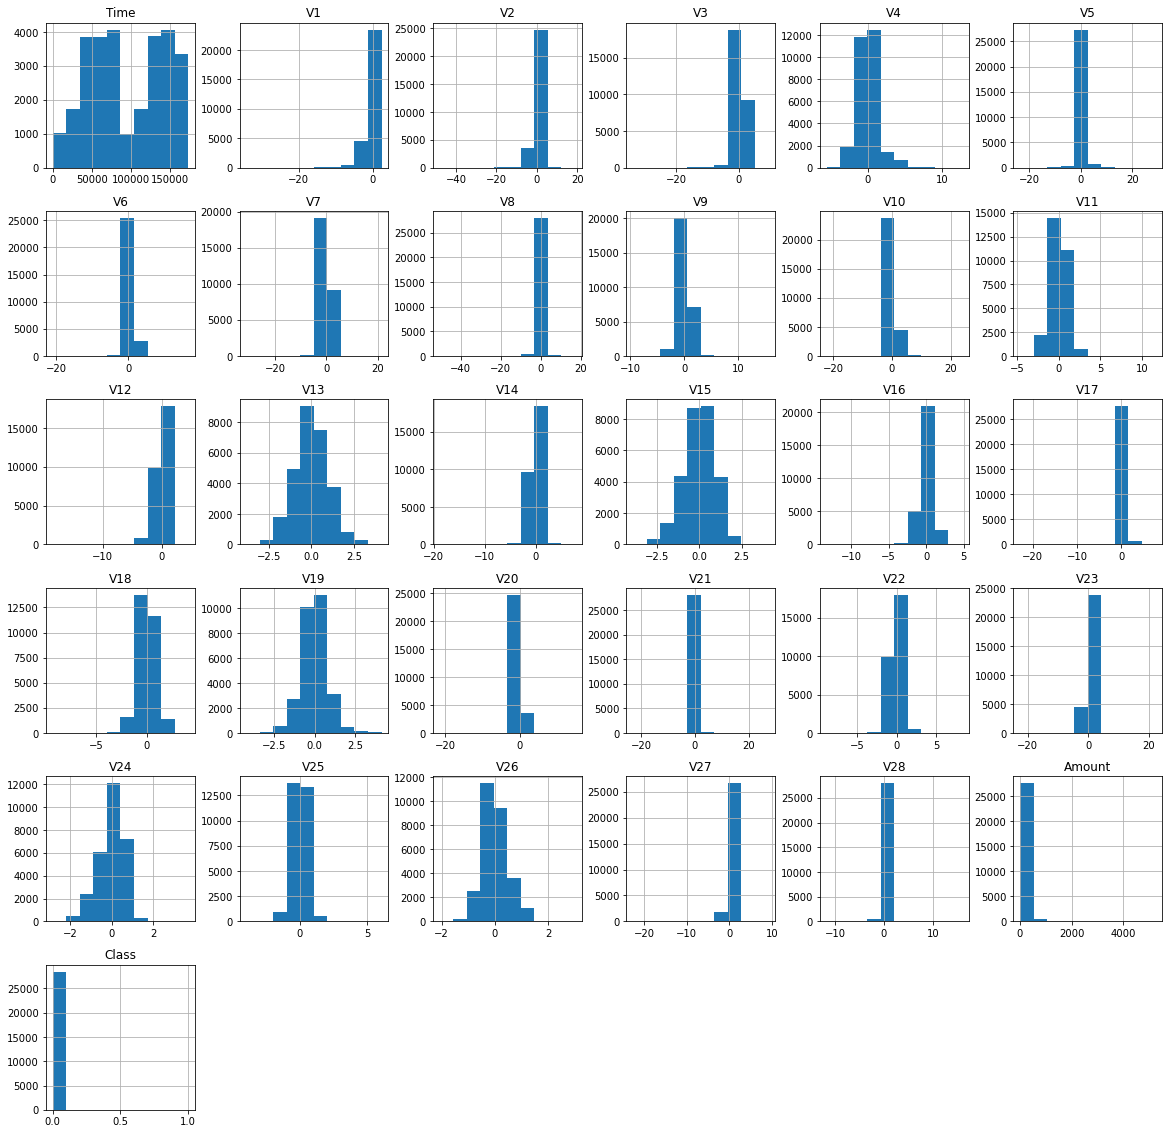

In [10]:
# Plot histogram of each parameter
data.hist(figsize=(20,20))

In [11]:
# Determine number of fraud cases in dataset
Fraud =  data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print(f'Fraud Cases: {len(Fraud)}')
print(f'Fraud Cases: {len(Valid)}')

0.001617724635132759
Fraud Cases: 46
Fraud Cases: 28435


<AxesSubplot:>

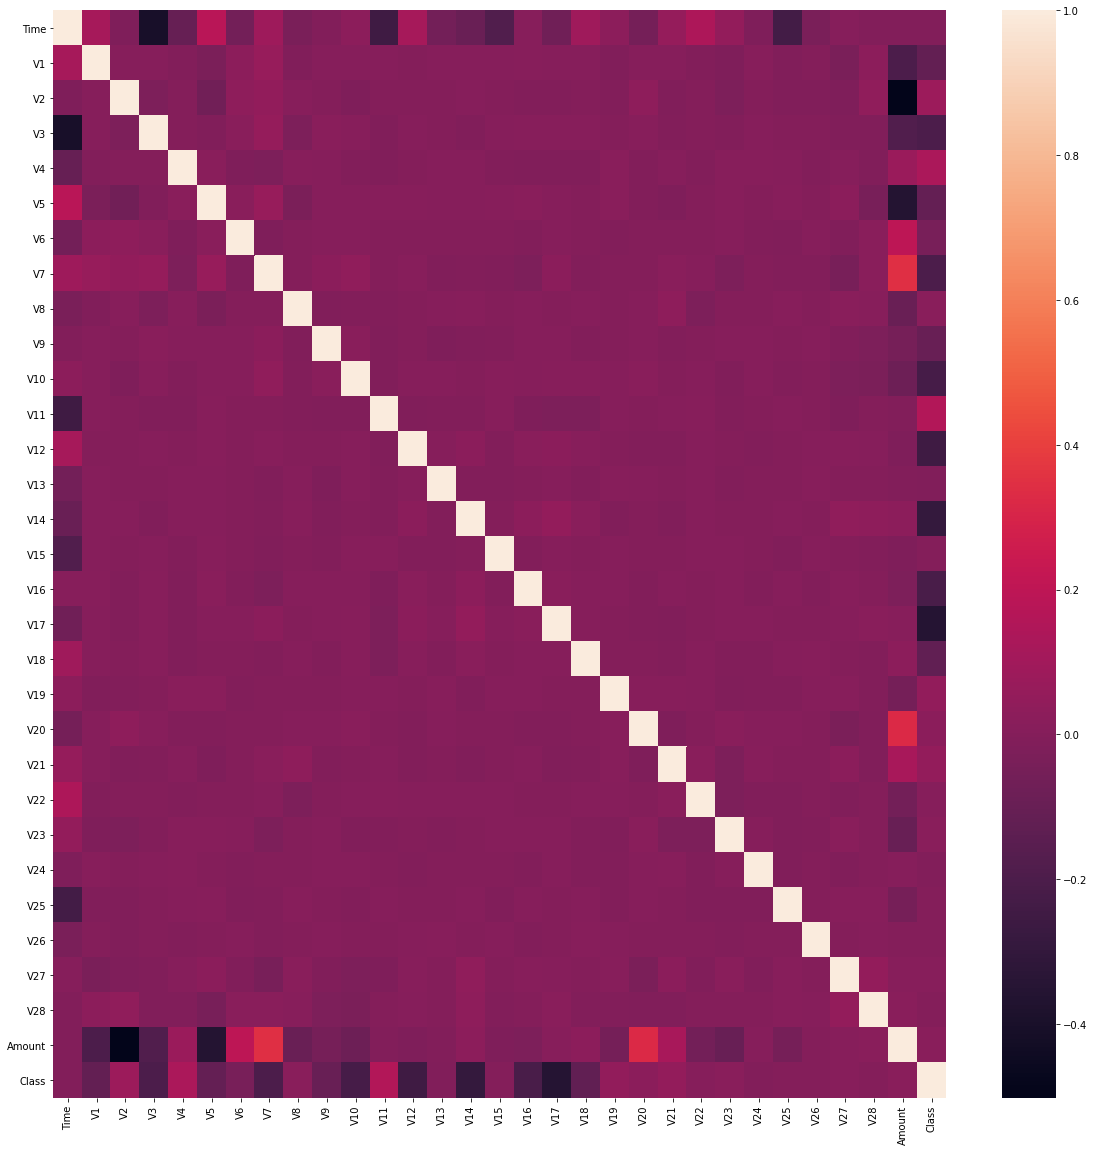

In [12]:
 # Correlation matrix
corr_mat = data.corr()

fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_mat)

### Preparing data for Unsupervised Learning

In [13]:
X = data.drop(['Class'],axis=1)
y = data['Class']

print(X.shape)
print(y.shape)

(28481, 30)
(28481,)


### Modeling with Isolation Trees & Local Outlier Factor
> SVM is also commonly seen in anomaly detection but is comparatively computationally expensive

In [14]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [15]:
# Define a random state
rand_state = 42

# Define the outlier detection methods
classifiers = {
    'Isolation Forest': IsolationForest(max_samples=len(X),
                                       contamination= outlier_fraction,
                                       random_state=rand_state),
    'Local Outlier Factor':LocalOutlierFactor(n_neighbors=20,
                                             contamination=outlier_fraction,
                                             )
}

In [16]:
# Fit the model
n_outliers = len(Fraud)

for i, (clf_name,clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud
    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1] = 1
    
    n_errors = (y_pred != y).sum()
    
    # Run classification metrics
    print(f'{clf_name}:{n_errors}')
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))

Isolation Forest:63
0.9977879990168884
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.32      0.33      0.32        46

    accuracy                           1.00     28481
   macro avg       0.66      0.66      0.66     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor:91
0.9968048874688389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.02      0.02      0.02        46

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



### Conclusion
* The Local Outlier Factor model performed poorly with only a **2% chance** of catching anomolous credit card transactions
* The Isolation Forest performed better by having about a **1 in 3 chance** of detecting fraudulent cases
* Considering that this dataset has labels other model alternatives may perform better than Unsupervised models at detecting fraudulent cases